In [1]:
# Importando as Bibliotecas Básicas
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Importando a Biblioteca do KNN
from sklearn.neighbors import KNeighborsClassifier
# Importando a Biblioteca de Acurácia, Matriz de Confusão (em quantos jogos entrou em quantos foi green ou red)
from sklearn.metrics import accuracy_score, confusion_matrix
# Importando a Biblioteca SkLearn para padronizar os dados (entre 0 e 1)
from sklearn.preprocessing import StandardScaler
# Importando a Biblioteca SkLearn para dividir os dados entre treinamento e teste
from sklearn.model_selection import train_test_split

In [2]:
# Importando os DataFrames

# England Premier League
df_ENG1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/England%20Premier%20League_20212022.xlsx?raw=true')
# England Championship
df_ENG2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/England%20Championship_20212022.xlsx?raw=true')

# France Ligue 1
df_FRA1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/France%20Ligue%201_20212022.xlsx?raw=true')
# France Ligue 2
df_FRA2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/France%20Ligue%202_20212022.xlsx?raw=true')

# Germany Bundesliga
df_GER1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Germany%20Bundesliga_20212022.xlsx?raw=true')
# Germany 2. Bundesliga
df_GER2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Germany%202.%20Bundesliga_20212022.xlsx?raw=true')

# Italy Serie A
df_ITA1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Italy%20Serie%20A_20212022.xlsx?raw=true')
# Italy Serie B
df_ITA2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Italy%20Serie%20B_20212022.xlsx?raw=true')

# Spain La Liga
df_SPA1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Spain%20La%20Liga_20212022.xlsx?raw=true')
# Spain Segunda División
df_SPA2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Spain%20Segunda%20Divisi%C3%B3n_20212022.xlsx?raw=true')

# Concatenando os DataFrames
df = [df_ENG1,df_ENG2,df_FRA1,df_FRA2,df_GER1,df_GER2,df_ITA1,df_ITA1,df_SPA1,df_SPA2]
df = pd.concat(df)
df = df[['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over25','FT_Goals_H','FT_Goals_A']]
df

,Home,Away,FT_Odds_H,FT_Odds_D,FT_Odds_A,FT_Odds_Over25,FT_Goals_H,FT_Goals_A
0,Brentford,Arsenal,3.90,3.40,2.05,2.20,2,0
1,Manchester United,Leeds United,1.62,4.15,5.25,1.69,5,1
2,Burnley,Brighton & Hove Albion,3.20,3.00,2.31,2.35,1,2
3,Chelsea,Crystal Palace,1.27,5.40,9.40,1.67,3,0
4,Everton,Southampton,1.84,3.65,3.85,1.85,3,1
...,...,...,...,...,...,...,...,...
463,Girona FC,SD Eibar,2.25,3.25,3.15,2.12,0,1
464,UD Las Palmas,CD Tenerife,1.91,3.20,3.75,2.10,1,2
465,SD Eibar,Girona FC,2.37,3.25,3.15,2.20,0,2
466,Girona FC,CD Tenerife,2.10,3.20,3.85,2.35,0,0


In [3]:
df['p_H'] = 1/df.FT_Odds_H
df['p_D'] = 1/df.FT_Odds_D
df['p_A'] = 1/df.FT_Odds_A
df['p_Over25'] = 1/df.FT_Odds_Over25
df

,Home,Away,FT_Odds_H,FT_Odds_D,FT_Odds_A,FT_Odds_Over25,FT_Goals_H,FT_Goals_A,p_H,p_D,p_A,p_Over25
0,Brentford,Arsenal,3.90,3.40,2.05,2.20,2,0,0.256410,0.294118,0.487805,0.454545
1,Manchester United,Leeds United,1.62,4.15,5.25,1.69,5,1,0.617284,0.240964,0.190476,0.591716
2,Burnley,Brighton & Hove Albion,3.20,3.00,2.31,2.35,1,2,0.312500,0.333333,0.432900,0.425532
3,Chelsea,Crystal Palace,1.27,5.40,9.40,1.67,3,0,0.787402,0.185185,0.106383,0.598802
4,Everton,Southampton,1.84,3.65,3.85,1.85,3,1,0.543478,0.273973,0.259740,0.540541
...,...,...,...,...,...,...,...,...,...,...,...,...
463,Girona FC,SD Eibar,2.25,3.25,3.15,2.12,0,1,0.444444,0.307692,0.317460,0.471698
464,UD Las Palmas,CD Tenerife,1.91,3.20,3.75,2.10,1,2,0.523560,0.312500,0.266667,0.476190
465,SD Eibar,Girona FC,2.37,3.25,3.15,2.20,0,2,0.421941,0.307692,0.317460,0.454545
466,Girona FC,CD Tenerife,2.10,3.20,3.85,2.35,0,0,0.476190,0.312500,0.259740,0.425532


In [4]:
df['p_H/p_D'] = df.p_H/df.p_D
df['p_H/p_A'] = df.p_H/df.p_A
df['p_D/p_A'] = df.p_D/df.p_A
df['p_D/p_Over25'] = df.p_D/df.p_Over25
df

,Home,Away,FT_Odds_H,FT_Odds_D,FT_Odds_A,FT_Odds_Over25,FT_Goals_H,FT_Goals_A,p_H,p_D,p_A,p_Over25,p_H/p_D,p_H/p_A,p_D/p_A,p_D/p_Over25
0,Brentford,Arsenal,3.90,3.40,2.05,2.20,2,0,0.256410,0.294118,0.487805,0.454545,0.871795,0.525641,0.602941,0.647059
1,Manchester United,Leeds United,1.62,4.15,5.25,1.69,5,1,0.617284,0.240964,0.190476,0.591716,2.561728,3.240741,1.265060,0.407229
2,Burnley,Brighton & Hove Albion,3.20,3.00,2.31,2.35,1,2,0.312500,0.333333,0.432900,0.425532,0.937500,0.721875,0.770000,0.783333
3,Chelsea,Crystal Palace,1.27,5.40,9.40,1.67,3,0,0.787402,0.185185,0.106383,0.598802,4.251969,7.401575,1.740741,0.309259
4,Everton,Southampton,1.84,3.65,3.85,1.85,3,1,0.543478,0.273973,0.259740,0.540541,1.983696,2.092391,1.054795,0.506849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Girona FC,SD Eibar,2.25,3.25,3.15,2.12,0,1,0.444444,0.307692,0.317460,0.471698,1.444444,1.400000,0.969231,0.652308
464,UD Las Palmas,CD Tenerife,1.91,3.20,3.75,2.10,1,2,0.523560,0.312500,0.266667,0.476190,1.675393,1.963351,1.171875,0.656250
465,SD Eibar,Girona FC,2.37,3.25,3.15,2.20,0,2,0.421941,0.307692,0.317460,0.454545,1.371308,1.329114,0.969231,0.676923
466,Girona FC,CD Tenerife,2.10,3.20,3.85,2.35,0,0,0.476190,0.312500,0.259740,0.425532,1.523810,1.833333,1.203125,0.734375


In [5]:
# Próximas Variáveis
    # media_chutes_no_gol_H
    # Custo e Valor do Gol
    # medias de gols feitos
    # medias de gols sofridos
    # saldo de gol
    # p_h e p_d polinomial de ordem 4
    # p_d e p_over25 polinomial de ordem 4
    # p_h e p_apolinomial de ordem 4

In [6]:
# Criando a Coluna de 0 e 1 para análise do Modelo de Machine Learning
df.loc[(df['FT_Goals_H'] > df['FT_Goals_A']), 'BackHome'] = 1
df.loc[(df['FT_Goals_H'] <= df['FT_Goals_A']), 'BackHome'] = 0

In [7]:
df = df.dropna()
df1 = df[['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over25','FT_Goals_H','FT_Goals_A','BackHome']]
df2 = df[['p_H','p_D','p_A','p_Over25','p_H/p_D','p_H/p_A','p_D/p_A','p_D/p_Over25','BackHome']]

In [8]:
df1 = df1.dropna()
# convertendo os arrays (matriz)
# definindo qual coluna é a entrada e qual é a saída
df1_x = df1.iloc[:,:].values

# separando os dados para treino e para teste
x_dados_treinamento, x_dados_teste = train_test_split(df1_x, test_size=0.20, random_state = 0)

df1 = pd.DataFrame(x_dados_teste)
df1.columns = ['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over25','FT_Goals_H','FT_Goals_A','BackHome']

In [9]:
df2 = df2.dropna()
# convertendo os arrays (matriz)
# definindo qual coluna é a entrada e qual é a saída
df2_x = df2.iloc[:,:-1].values
df2_y = df2.iloc[:,-1].values

In [10]:
df2_x

array([[0.25641026, 0.29411765, 0.48780488, ..., 0.52564103, 0.60294118,
        0.64705882],
       [0.61728395, 0.24096386, 0.19047619, ..., 3.24074074, 1.26506024,
        0.40722892],
       [0.3125    , 0.33333333, 0.43290043, ..., 0.721875  , 0.77      ,
        0.78333333],
       ...,
       [0.42194093, 0.30769231, 0.31746032, ..., 1.32911392, 0.96923077,
        0.67692308],
       [0.47619048, 0.3125    , 0.25974026, ..., 1.83333333, 1.203125  ,
        0.734375  ],
       [0.45454545, 0.34246575, 0.35460993, ..., 1.28181818, 0.96575342,
        0.89041096]])

In [11]:
df2_y

array([1., 1., 0., ..., 0., 0., 0.])

In [12]:
# # padronizando os dados de entrada
# scaler_goals = StandardScaler()
# df2_x = scaler_goals.fit_transform(df2_x)

In [13]:
# separando os dados para treino e para teste
x_dados_treinamento, x_dados_teste, y_dados_treinamento, y_dados_teste = train_test_split(df2_x, df2_y, test_size=0.20, random_state = 0)

In [14]:
# Definições de Parâmetros e dados de entrada e resultado para treinamento
knn_dados = KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2)
knn_dados.fit(x_dados_treinamento, y_dados_treinamento)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# Previsões
previsoes_knn = knn_dados.predict(x_dados_teste)

In [16]:
# taxa de acerto
accuracy_score(y_dados_teste, previsoes_knn)

0.6329923273657289

In [17]:
# matriz de confusão
confusion_matrix(y_dados_teste, previsoes_knn)
# a11 = coisas que ele preveu como sendo 0 e foi 0 (312 jogos ele preveu que não seria H e não foi H) 
# a21 = coisas que ele preveu como sendo 0 e foi 1 (165 jogos ele preveu que não seria H e foi H)
# a12 = coisas que ele preveu como sendo 1 e foi 0 (125 jogos ele preveu que seria H e não foi H)
# a22 = coisas que ele preveu como sendo 1 e foi 1 (182 jogos ele preveu que seria H e foi H)

array([[298, 130],
       [157, 197]])

In [18]:
# jogos totais usados para teste
jogos_total_teste = confusion_matrix(y_dados_teste, previsoes_knn)[0][0]+confusion_matrix(y_dados_teste, previsoes_knn)[0][1]+confusion_matrix(y_dados_teste, previsoes_knn)[1][0]++confusion_matrix(y_dados_teste, previsoes_knn)[1][1]
jogos_total_teste

782

In [19]:
# quantidade total de entrada
jogos_entrada = confusion_matrix(y_dados_teste, previsoes_knn)[0][1]+confusion_matrix(y_dados_teste, previsoes_knn)[1][1]
jogos_entrada

327

In [20]:
# calculando a taxa de entrada
taxa_de_entrada = (jogos_entrada/jogos_total_teste)*100
taxa_de_entrada

41.81585677749361

In [21]:
# calculando a taxa de acerto
taxa_de_acerto = (confusion_matrix(y_dados_teste, previsoes_knn)[1][1]/jogos_entrada)*100
taxa_de_acerto

60.24464831804281

In [22]:
df1["Previsões"] = previsoes_knn

Nº
327    37.54
Name: Profit_acu, dtype: object

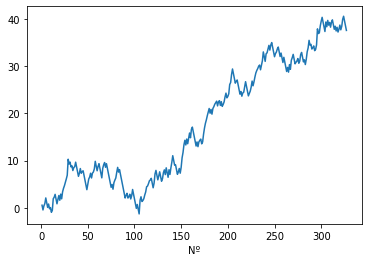

In [23]:
stake = 1
win_Back = stake * (df1.FT_Odds_H - 1)
lose_Back = -stake

df1.loc[(df1['Previsões'] == 1) & (df1['BackHome'] == 1), 'Profit'] = win_Back
df1.loc[(df1['Previsões'] == 1) & (df1['BackHome'] == 0), 'Profit'] = lose_Back
df1.loc[(df1['Previsões'] == 0) & (df1['BackHome'] == 1), 'Profit'] = 0
df1.loc[(df1['Previsões'] == 0) & (df1['BackHome'] == 0), 'Profit'] = 0

filtro = df1.Previsões == 1
df0 = df1[filtro]

# Ajustando o Índice
df0.reset_index(inplace=True, drop=True)
df0.index = df0.index.set_names(['Nº'])
df0 = df0.rename(index=lambda x: x + 1)

df0['Profit_acu'] = df0.Profit.cumsum()
df0.Profit_acu.plot()
df0.Profit_acu.tail(1)

In [24]:
ROI = df0.Profit_acu.tail(1)/len(df0)*100
ROI

Nº
327    11.480122
Name: Profit_acu, dtype: object